In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [2]:
sns.set_style("whitegrid")

In [18]:
# Path to load mainDF from
load_path = '/Volumes/Britt_SSD/ReDoEvals3/comboEval.parquet'
# Path to save visuals
save_path = '/Users/byrdsmyth/iCloud/Documents/School/Thesis/Stimuli/'
# Set printed output or not
verbose = False
# Set to save figures or not
saveFigs = False
# Set figuresize
fgsz = (2.5,5)
# list of actions
action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']

In [4]:
allEvalsDF = pd.read_parquet(load_path)

In [5]:
# Generate list of agents in order

evalAgents = allEvalsDF.agentNum.unique()
names = allEvalsDF.agent.unique()
temp = allEvalsDF[allEvalsDF['agentNum']==2]
if verbose:
    print(evalAgents)
    print(temp.agent.unique())
    

In [6]:
# Df for each Agent Evaluation
evalDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = allEvalsDF[allEvalsDF['agent'] == agent]
    evalDFsList.append(temp)
    

In [7]:
# Df for each Agent Evaluation Key States
evalKeysDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = evalDFsList[index]
    temp2 = temp[temp['keyNum'] > 0]
    evalKeysDFsList.append(temp2)


In [8]:
if verbose:
    names = []
    for i in evalDFsList:
        print(i.agent.unique())
        names.append(str(i.agent.unique()))

In [9]:
# Where to save the output so it is easy to get for loading into Gorilla Experiment Builder
workingDir = "/Volumes/Britt_SSD/ReDoEvals3/"
agent_files = ['pp700/Visuals',"pp23/Visuals",'Fear2/Visuals','fear18/Visuals','NmlOnly3/Visuals',
               'NmlOnly21/Visuals','std300/Visuals','Std2/Visuals','Std23/Visuals','std23_2/Visuals']


[0, 200, 400, 600, 800]
10.0
50.0
100.0
200.0
210.0
250.0
400.0
410.0


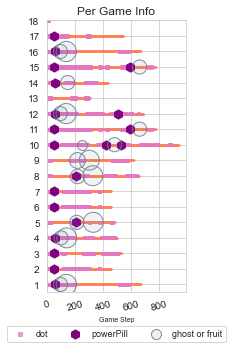

[0, 200, 400, 600, 800, 1000, 1200]
10.0
50.0
100.0
200.0
210.0
400.0
410.0
810.0


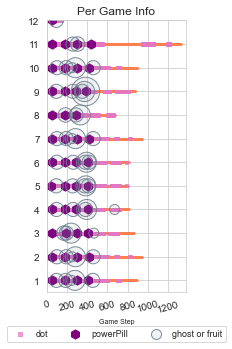

[0, 200, 400, 600, 800, 1000]
10.0
50.0
100.0
110.0
200.0
210.0
400.0


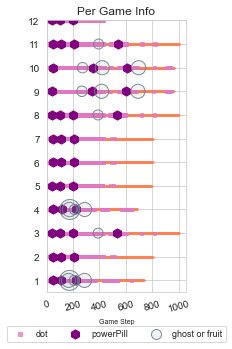

[0, 200, 400, 600, 800, 1000]
10.0
50.0
100.0
200.0
210.0
400.0


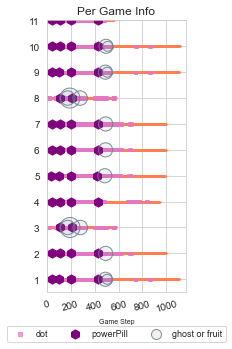

[0, 200, 400, 600, 800, 1000]
10.0
50.0
100.0
110.0
200.0
210.0
400.0
410.0


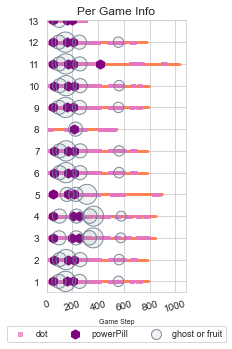

[0, 200, 400, 600, 800, 1000, 1200]
10.0
50.0
100.0
200.0
210.0
400.0
410.0


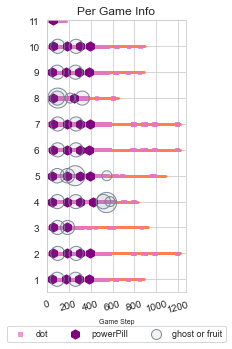

[0, 200, 400, 600, 800]
10.0
50.0
100.0
110.0
200.0
210.0
400.0
410.0


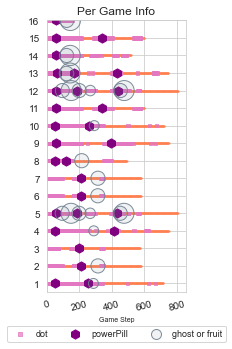

[0, 200, 400, 600, 800, 1000, 1200]
10.0
50.0
100.0
200.0
210.0
400.0
410.0
800.0


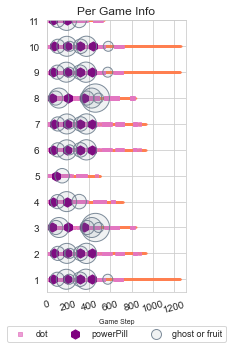

[0, 200, 400, 600, 800, 1000]
10.0
50.0
100.0
110.0
200.0
210.0
250.0
400.0
410.0
800.0


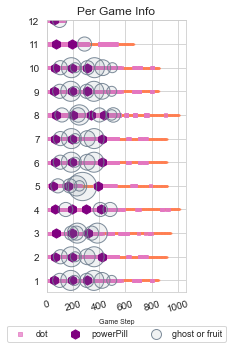

[0, 200, 400, 600, 800, 1000]
10.0
50.0
100.0
110.0
200.0
210.0
250.0
400.0
410.0
800.0


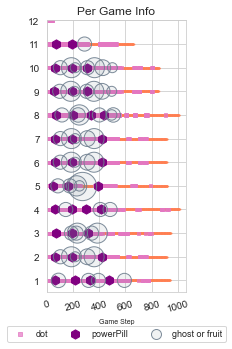

In [17]:
###### POINTS SUMMARIES ######

colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['tab:pink', 'purple', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey', 'slategrey','slategrey','slategrey','slategrey','slategrey','slategrey']
sns.set_style(style="whitegrid")
rewards = ["dot", "powerPill", "ghost or fruit"]

for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=fgsz)
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    
    length1 = len(agent)
    x_high = int(agent["epoch_step"].max())
    temp_ticks = np.arange(0, x_high, 200).tolist()
    print(temp_ticks)
    
    plt.scatter("epoch_step","epoch",c="coral",s=1,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(sorted(temp.reward.unique())):
        print(rewAmnt)
        if indexR == 0:
            plt.scatter("epoch_step","epoch",s="reward",c=colors2[indexR],data=temp[temp['reward']==rewAmnt], 
                        alpha=0.7,marker="s", label=rewards[indexR])
        elif rewAmnt > 30 and rewAmnt < 90:
            plt.scatter("epoch_step","epoch",marker="h",s=85,c=colors2[indexR],data=temp[temp['reward']==rewAmnt], 
                        alpha=1, label=rewards[indexR])
        elif rewAmnt >= 90 and rewAmnt < 110:
            plt.scatter("epoch_step","epoch",s="reward", edgecolor=((112/255, 128/255, 144/255,0.9),),facecolor=((112/255, 128/255, 144/255,0.1),),data=temp[temp['reward']==rewAmnt], marker="o", label=rewards[indexR])
        else:
            plt.scatter("epoch_step","epoch",s="reward",edgecolor=((112/255, 128/255, 144/255,0.9),), facecolor=((112/255, 128/255, 144/255,0.1),),data=temp[temp['reward']==rewAmnt], marker="o",label = "")
#     plt.ylabel('Game Number', fontsize=9)
    plt.title("Per Game Info")
    plt.ylim((0.5,temp["epoch"].max()))
    plt.xlabel('Game Step', fontsize=7)
    plt.xticks(temp_ticks, rotation=15)
    plt.yticks(temp.epoch.unique())
    plt.xlim(0, x_high+50)
    plt.legend(loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.199), fontsize=9)

    if saveFigs:
        filename = "Bars/" + names[index] + "PacmanPoints_Summary.png"
        tmp_path = os.path.join(workingDir, agent_files[index])
        filepath = os.path.join(tmp_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=800, bbox_inches='tight',pad_inches=0.6)
    plt.show()
    

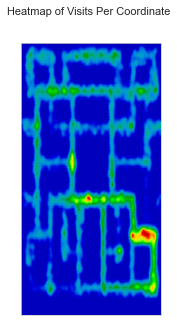

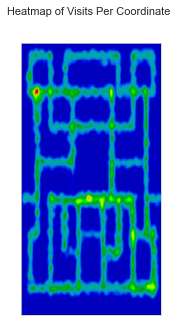

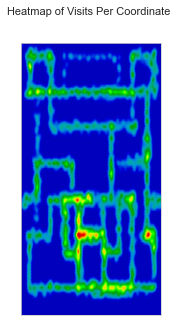

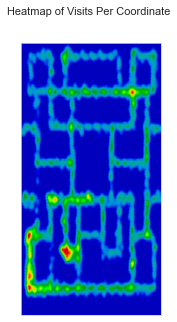

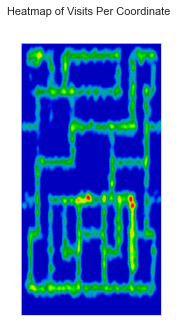

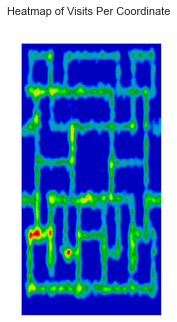

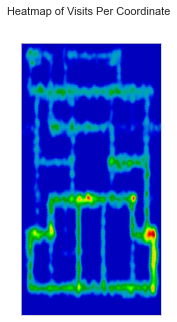

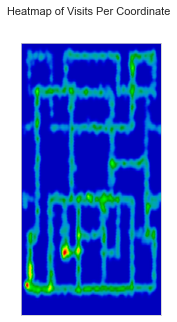

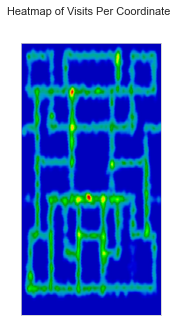

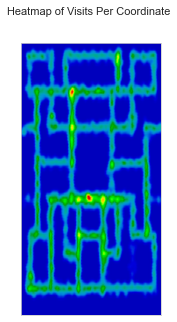

In [20]:
###### MOVEMENT MAPS ######

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from scipy.ndimage import gaussian_filter

# Remove the middle 40% of the RdBu_r colormap
interval = np.hstack([np.linspace(0.17, 0.95)])
colors = plt.cm.nipy_spectral(interval)
cmap = LinearSegmentedColormap.from_list('name', colors).reversed()

# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

t_c = ['lavender','lavender','lavender']
mpl.rc('image', cmap='Spectral_r')

all_copy = allEvalsDF.copy()

for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp1 = all_copy[all_copy['agentNum']==df].copy()

    fig, ax = plt.subplots(1, figsize=fgsz)
    plt.gca().invert_yaxis()

    
    temp2 = temp1
#     ax.set_title("All Combined")
        

    b_r = 0.99
    cm = 'RdYlBu_r'

    # drop instances of sitting in middle of maze
#     temp2 = temp2.drop(temp2[(temp2.pacman_x>72) & (temp2.pacman_x<84) & (temp2.pacman_y<102) & (temp2.pacman_y>94)].index)
    bins=[np.arange(-1,temp['pacman_coord_x'].max()+3,b_r),np.arange(-2,temp['pacman_coord_y'].max()+15,b_r)]
    # Start making image
    heatmap, xedges, yedges = np.histogram2d(temp2['pacman_coord_x'], temp2['pacman_coord_y'], (bins),density=True)

#             plt.clf()

#     heatmap = np.power(heatmap,0.4)
    heatmap = np.power(heatmap,0.38)
    data = gaussian_filter(heatmap, sigma=1.65)
    ax.pcolormesh(data.T, cmap=cmap.reversed(), shading='gouraud')
    ax.set_aspect('auto')

#     sm = plt.cm.ScalarMappable(cmap=cmap.reversed(), norm=norm)
#     sm.set_array([])
#     plt.colorbar(sm, shrink=.35)
    
    ax.set_xlabel=None
    ax.set_yticklabels([])
    ax.set_ylabel=None
    ax.set_xticklabels([])
    
    fig.suptitle("Heatmap of Visits Per Coordinate", fontsize=11)

    if saveFigs:
        filename = "Coordinates/MM" + names[agent_index] + ".png"
        tmp_path = os.path.join(workingDir, agent_files[index])
        filepath = os.path.join(tmp_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=800, bbox_inches='tight',pad_inches=0.6)
    plt.show()
    

0.0
examining: to_red_ghost which is to_red_ghost and To Red


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

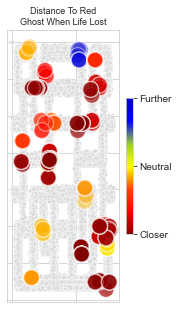

examining: to_orange_ghost which is to_orange_ghost and To Orange


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

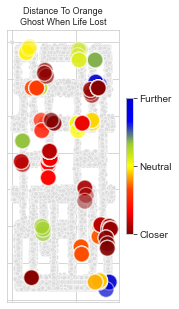

examining: to_blue_ghost which is to_blue_ghost and To Blue


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

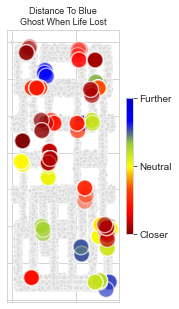

examining: to_pink_ghost which is to_pink_ghost and To Pink


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

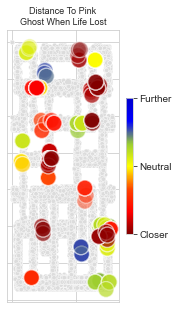

1.0
examining: to_red_ghost which is to_red_ghost and To Red


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

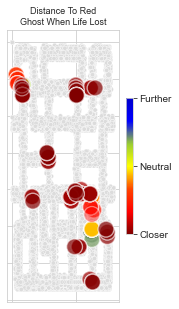

examining: to_orange_ghost which is to_orange_ghost and To Orange


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

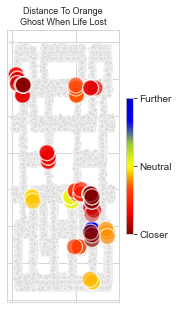

examining: to_blue_ghost which is to_blue_ghost and To Blue


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

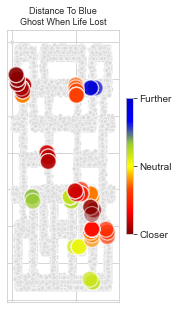

examining: to_pink_ghost which is to_pink_ghost and To Pink


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

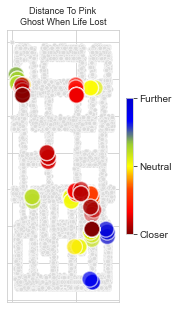

2.0
examining: to_red_ghost which is to_red_ghost and To Red


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
##### GHOST MAPS #####

ofInterest = ['to_red_ghost','to_orange_ghost','to_blue_ghost','to_pink_ghost']
interestNames = ["To Red", "To Orange", "To Blue", "To Pink"]
temp2 = allEvalsDF[allEvalsDF['beforeLifeLoss']>0]

sns.set_style("whitegrid")

colors = ["mediumblue","blue","yellowgreen","yellow","orangered","red",'maroon']
cmap = LinearSegmentedColormap.from_list("mycmap", colors).reversed()

for agent_index, agNum in enumerate(temp2.agentNum.unique()):
    print(evalAgents[agent_index])
    for index, item in enumerate(ofInterest):
        print("examining: " + str(item) + " which is " + str(ofInterest[index]) + " and " + str(interestNames[index]))
        plt.figure(figsize=fgsz)
        
        temp5 = allEvalsDF
        temp5['neg_y'] = allEvalsDF['pacman_coord_y']*(-1)
        ax = sns.scatterplot(allEvalsDF["pacman_coord_x"], temp5['neg_y'], color = 'gainsboro', legend = False,
                            size = allEvalsDF["reward"])
        
        temp = temp2[temp2['agentNum']==agNum]
        x = temp[[item]].values.astype(float)
        # Create a minimum and maximum processor object
        min_max_scaler = preprocessing.MinMaxScaler()

        # Create an object to transform the data to fit minmax processor
        x_scaled = min_max_scaler.fit_transform(x)

        # Run the normalizer on the dataframe
        temp["norm_red"] = pd.DataFrame(x_scaled)

        temp['neg_y'] = temp['pacman_coord_y']*(-1)
        
        temp.sort_values(by=[item],inplace=True, ascending=False)
        
        g=sns.scatterplot("pacman_coord_x", "neg_y", hue = item, palette=cmap, legend = False,
                            s=250, alpha=0.45, data=temp, ax=ax)
        g.set(xlabel=None)
        g.set(xticklabels=[])
        g.set(ylabel=None)
        g.set(yticklabels=[])

        norm = plt.Normalize(temp['norm_red'].min(), temp['norm_red'].max())
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        # Remove the legend and add a colorbar
#         navy_patch = mpatches.Patch(color='steelblue', label='Further')
#         red_patch = mpatches.Patch(color='firebrick', label='Closer')
#         plt.legend(handles=[navy_patch, red_patch], ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.13), fontsize=9)
        cbar = ax.figure.colorbar(sm, shrink=0.5, ticks=[-0.1,0,0.1])
        cbar.ax.set_yticklabels(['Closer', 'Neutral', 'Further'])

        plt.title("Distance " + interestNames[index] + "\nGhost When Life Lost", fontsize=9)
        ax.set(xlabel='', ylabel='')
        
        if saveFigs:
            filename = "ToGhosts/" + evalAgents[agent_index] + item + "B4Die.png"
            tmp_path = os.path.join(workingDir, agent_files[index])
            filepath = os.path.join(tmp_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=800, bbox_inches='tight',pad_inches=0.6)
        plt.show()
    